In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("C:\\Users\\Sarthak Srivastava\\Application of ML in Industry\\Data\\train_u6lujuX_CVtuZ9i (1).csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data.shape


(614, 13)

In [8]:
data = data.drop(['Loan_ID'], axis = 1)

In [9]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

In [11]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [13]:
#removing outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1

In [14]:
data = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis=1)]

In [15]:
# Treating the Skewed Distribution
data['ApplicantIncome'] = np.sqrt(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.sqrt(data['CoapplicantIncome'])
data['LoanAmount'] = np.sqrt(data['LoanAmount'])
data['Loan_Amount_Term'] = np.sqrt(data['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

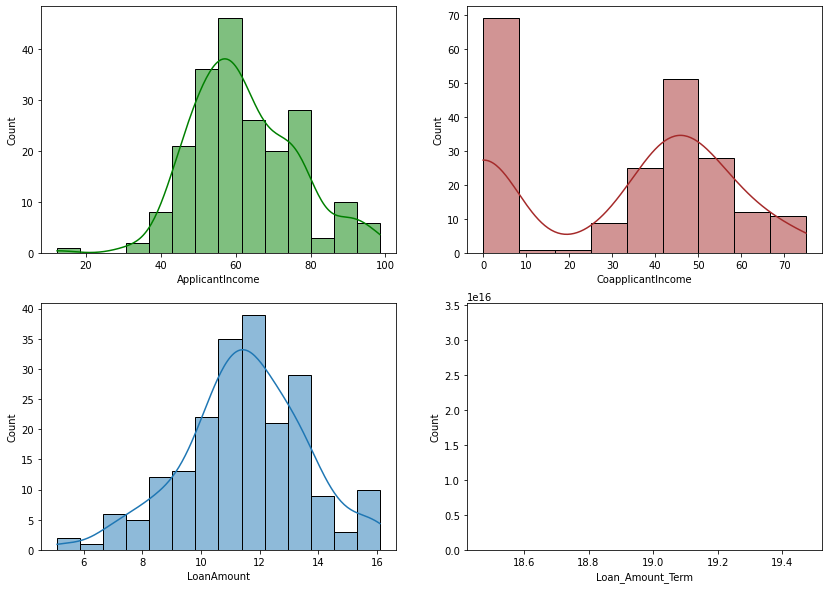

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(14,10))

sns.histplot(data=data, x='ApplicantIncome', kde=True, ax=axs[0,0], color='green')
sns.histplot(data=data, x='CoapplicantIncome', kde=True, ax=axs[0,1], color='brown')
sns.histplot(data=data, x='LoanAmount', kde=True, ax=axs[1,0])
sns.histplot(data=data, x='Loan_Amount_Term', kde=True, ax=axs[1,1], color='violet')

In [17]:
# As the Data in the dependent variable is Imbalanced. So we will use the SMOTE technique to oversample the data to avoid overfitting.
print(data.loc[data['Loan_Status'] == 1].count())
print(data.query('Loan_Status == 0').count())

Gender               172
Married              172
Dependents           172
Education            172
Self_Employed        172
ApplicantIncome      172
CoapplicantIncome    172
LoanAmount           172
Loan_Amount_Term     172
Credit_History       172
Property_Area        172
Loan_Status          172
dtype: int64
Gender               35
Married              35
Dependents           35
Education            35
Self_Employed        35
ApplicantIncome      35
CoapplicantIncome    35
LoanAmount           35
Loan_Amount_Term     35
Credit_History       35
Property_Area        35
Loan_Status          35
dtype: int64


In [18]:
X = data.drop(["Loan_Status"], axis=1)
y = data["Loan_Status"]

In [20]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [23]:
pip install imbalanced-learn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [24]:
from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X, y)

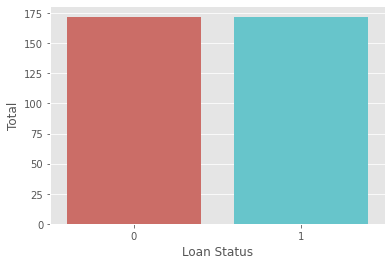

In [25]:
sns.countplot(data=data, x=y, palette='hls')
plt.xlabel('Loan Status')
plt.ylabel('Total')
plt.show()

In [26]:
# Normalizing the Data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

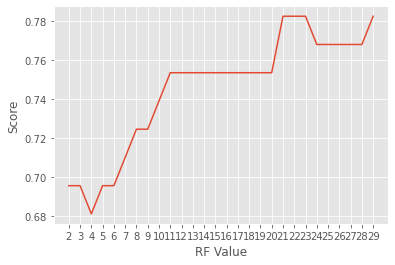

Random Forest Accuracy:  78.26%


In [27]:
# Random Forest
ListRF = []
for i in range(2,30):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    ListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,30), ListRF)
plt.xticks(np.arange(2,30,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(ListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))